# **Customer Personality Analysis using K-Means Clustering**

**Name: Yohanes Setiawan**

**Region: Surabaya, Indonesia**


# **Business Understanding**

* Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

* Customer Personality Analysis in Customer Segmentation helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Main Objective

Cluster Analysis for Customer Segmentation in order to have a good understanding of Customer Personality Analysis

## Analytical Approach

* Descriptive analysis
* Graph analysis
* Cluster analysis (K-Means Clustering)
* Dimensionality reduction for showing clustering graph

# **Data Understanding**

## Dataset

The dataset for this project is provided by Dr. Omar Romero-Hernandez.

Extracted from https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

Attributes

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd_market = pd.read_csv("/content/drive/My Drive/marketing_campaign.csv", sep = "\t")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd_market.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Dataset Info

In [ ]:
pd_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Checking Missing Values

In [ ]:
print("Missing Value from the Dataset for each column in pd_train: ")
print(pd_market.isnull().sum())

Missing Value from the Dataset for each column in pd_train: 
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
pd_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

### Checking Duplicated Data

In [ ]:
pd_market.duplicated().sum()

0

## Descriptive Statistics

### Numerical Features

In [ ]:
pd_market.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


* Z_CostContact and Z_Revenue has 0 standard deviation. This means, they have same values and have no effects on cluster analysis result. 
* Therefore, they could be removed

### Categorical Features

In [ ]:
pd_market.describe(exclude=['float64','int64'])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


# **Data Cleaning**

## Handling Missing Value

In [ ]:
pd_market = pd_market[pd_market['Income'].notna()]
print("Updated Missing Value from the Dataset for each column in pd_train: ")
print(pd_market.isnull().sum())

Updated Missing Value from the Dataset for each column in pd_train: 
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


## Drop Columns

* Drop `Z_CostContact` and `Z_Revenue`

In [ ]:
pd_market = pd_market[pd_market.columns.difference(['Z_CostContact', 'Z_Revenue'])]
pd_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcceptedCmp1         2216 non-null   int64  
 1   AcceptedCmp2         2216 non-null   int64  
 2   AcceptedCmp3         2216 non-null   int64  
 3   AcceptedCmp4         2216 non-null   int64  
 4   AcceptedCmp5         2216 non-null   int64  
 5   Complain             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Education            2216 non-null   object 
 8   ID                   2216 non-null   int64  
 9   Income               2216 non-null   float64
 10  Kidhome              2216 non-null   int64  
 11  Marital_Status       2216 non-null   object 
 12  MntFishProducts      2216 non-null   int64  
 13  MntFruits            2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  MntMeatProducts      2216 non-null   i

In [ ]:
pd_market.to_csv('pd_market.csv', index=False)
!cp 'pd_market.csv' '/content/drive/MyDrive/IBM ML/Clustering'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd_market = pd.read_csv("/content/drive/MyDrive/IBM ML/Clustering/pd_market.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd_market.head()

In [ ]:
pd_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AcceptedCmp1         2216 non-null   int64  
 1   AcceptedCmp2         2216 non-null   int64  
 2   AcceptedCmp3         2216 non-null   int64  
 3   AcceptedCmp4         2216 non-null   int64  
 4   AcceptedCmp5         2216 non-null   int64  
 5   Complain             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Education            2216 non-null   object 
 8   ID                   2216 non-null   int64  
 9   Income               2216 non-null   float64
 10  Kidhome              2216 non-null   int64  
 11  Marital_Status       2216 non-null   object 
 12  MntFishProducts      2216 non-null   int64  
 13  MntFruits            2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  MntMeatProducts      2216 non-null   i

# **Feature Engineering**

## Create new Columns for Analysis

* Accepted Campaign = AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5
* Amount of Purchases = MntFishProducts + MntFruits + MntGoldProds + MntMeatProducts + MntSweetProducts + MntWines
* Number of Purchases = NumCatalogPurchases + NumDealsPurchases + NumStorePurchases + NumWebPurchases

In [ ]:
acc = pd_market['AcceptedCmp1'] + pd_market['AcceptedCmp2'] + pd_market['AcceptedCmp3'] + pd_market['AcceptedCmp4'] + pd_market['AcceptedCmp5']
pd_market['Accepted Campaign'] = acc
pd_market.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Dt_Customer,Education,ID,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,Accepted Campaign
0,0,0,0,0,0,0,04-09-2012,Graduation,5524,58138.0,0,Single,172,88,88,546,88,635,10,3,4,8,7,58,1,0,1957,0
1,0,0,0,0,0,0,08-03-2014,Graduation,2174,46344.0,1,Single,2,1,6,6,1,11,1,2,2,1,5,38,0,1,1954,0
2,0,0,0,0,0,0,21-08-2013,Graduation,4141,71613.0,0,Together,111,49,42,127,21,426,2,1,10,8,4,26,0,0,1965,0
3,0,0,0,0,0,0,10-02-2014,Graduation,6182,26646.0,1,Together,10,4,5,20,3,11,0,2,4,2,6,26,0,0,1984,0
4,0,0,0,0,0,0,19-01-2014,PhD,5324,58293.0,1,Married,46,43,15,118,27,173,3,5,6,5,5,94,0,0,1981,0


In [ ]:
am = pd_market['MntFishProducts'] + pd_market['MntFruits'] + pd_market['MntGoldProds'] + pd_market['MntMeatProducts'] + pd_market['MntSweetProducts'] + pd_market['MntWines']
pd_market['Amount of Purchases'] = am
pd_market.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Dt_Customer,Education,ID,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,Accepted Campaign,Amount of Purchases
0,0,0,0,0,0,0,04-09-2012,Graduation,5524,58138.0,0,Single,172,88,88,546,88,635,10,3,4,8,7,58,1,0,1957,0,1617
1,0,0,0,0,0,0,08-03-2014,Graduation,2174,46344.0,1,Single,2,1,6,6,1,11,1,2,2,1,5,38,0,1,1954,0,27
2,0,0,0,0,0,0,21-08-2013,Graduation,4141,71613.0,0,Together,111,49,42,127,21,426,2,1,10,8,4,26,0,0,1965,0,776
3,0,0,0,0,0,0,10-02-2014,Graduation,6182,26646.0,1,Together,10,4,5,20,3,11,0,2,4,2,6,26,0,0,1984,0,53
4,0,0,0,0,0,0,19-01-2014,PhD,5324,58293.0,1,Married,46,43,15,118,27,173,3,5,6,5,5,94,0,0,1981,0,422


In [ ]:
# Number of Purchases = NumCatalogPurchases + NumDealsPurchases + NumStorePurchases + NumWebPurchases + NumWebVisitsMonth
num = pd_market['NumCatalogPurchases'] + pd_market['NumDealsPurchases'] + pd_market['NumStorePurchases'] + pd_market['NumWebPurchases']
pd_market['Number of Purchases'] = num
pd_market.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Dt_Customer,Education,ID,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,Accepted Campaign,Amount of Purchases,Number of Purchases
0,0,0,0,0,0,0,04-09-2012,Graduation,5524,58138.0,0,Single,172,88,88,546,88,635,10,3,4,8,7,58,1,0,1957,0,1617,25
1,0,0,0,0,0,0,08-03-2014,Graduation,2174,46344.0,1,Single,2,1,6,6,1,11,1,2,2,1,5,38,0,1,1954,0,27,6
2,0,0,0,0,0,0,21-08-2013,Graduation,4141,71613.0,0,Together,111,49,42,127,21,426,2,1,10,8,4,26,0,0,1965,0,776,21
3,0,0,0,0,0,0,10-02-2014,Graduation,6182,26646.0,1,Together,10,4,5,20,3,11,0,2,4,2,6,26,0,0,1984,0,53,8
4,0,0,0,0,0,0,19-01-2014,PhD,5324,58293.0,1,Married,46,43,15,118,27,173,3,5,6,5,5,94,0,0,1981,0,422,19


## Estimating Customer's Age

Estimating customer's age by subtracting the year of `Dt_Customer` and `Year_Birth`

In [ ]:
pd_market['Dt_Customer'] = pd.to_datetime(pd_market['Dt_Customer'], format='%d-%m-%Y')
pd_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   AcceptedCmp1         2216 non-null   int64         
 1   AcceptedCmp2         2216 non-null   int64         
 2   AcceptedCmp3         2216 non-null   int64         
 3   AcceptedCmp4         2216 non-null   int64         
 4   AcceptedCmp5         2216 non-null   int64         
 5   Complain             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Education            2216 non-null   object        
 8   ID                   2216 non-null   int64         
 9   Income               2216 non-null   float64       
 10  Kidhome              2216 non-null   int64         
 11  Marital_Status       2216 non-null   object        
 12  MntFishProducts      2216 non-null   int64         
 13  MntFruits            2216 non-nul

In [ ]:
pd_market['Dt_Customer_Year'] = pd.DatetimeIndex(pd_market['Dt_Customer']).year
pd_market.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Dt_Customer,Education,ID,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,Accepted Campaign,Amount of Purchases,Number of Purchases,Dt_Customer_Year
0,0,0,0,0,0,0,2012-09-04,Graduation,5524,58138.0,0,Single,172,88,88,546,88,635,10,3,4,8,7,58,1,0,1957,0,1617,25,2012
1,0,0,0,0,0,0,2014-03-08,Graduation,2174,46344.0,1,Single,2,1,6,6,1,11,1,2,2,1,5,38,0,1,1954,0,27,6,2014
2,0,0,0,0,0,0,2013-08-21,Graduation,4141,71613.0,0,Together,111,49,42,127,21,426,2,1,10,8,4,26,0,0,1965,0,776,21,2013
3,0,0,0,0,0,0,2014-02-10,Graduation,6182,26646.0,1,Together,10,4,5,20,3,11,0,2,4,2,6,26,0,0,1984,0,53,8,2014
4,0,0,0,0,0,0,2014-01-19,PhD,5324,58293.0,1,Married,46,43,15,118,27,173,3,5,6,5,5,94,0,0,1981,0,422,19,2014


In [ ]:
age = pd_market['Dt_Customer_Year'] - pd_market['Year_Birth']
pd_market['Age'] = age
pd_market.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Dt_Customer,Education,ID,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,Accepted Campaign,Amount of Purchases,Number of Purchases,Dt_Customer_Year,Age
0,0,0,0,0,0,0,2012-09-04,Graduation,5524,58138.0,0,Single,172,88,88,546,88,635,10,3,4,8,7,58,1,0,1957,0,1617,25,2012,55
1,0,0,0,0,0,0,2014-03-08,Graduation,2174,46344.0,1,Single,2,1,6,6,1,11,1,2,2,1,5,38,0,1,1954,0,27,6,2014,60
2,0,0,0,0,0,0,2013-08-21,Graduation,4141,71613.0,0,Together,111,49,42,127,21,426,2,1,10,8,4,26,0,0,1965,0,776,21,2013,48
3,0,0,0,0,0,0,2014-02-10,Graduation,6182,26646.0,1,Together,10,4,5,20,3,11,0,2,4,2,6,26,0,0,1984,0,53,8,2014,30
4,0,0,0,0,0,0,2014-01-19,PhD,5324,58293.0,1,Married,46,43,15,118,27,173,3,5,6,5,5,94,0,0,1981,0,422,19,2014,33


## Categorical Encoding



I am going to use `Education` in my cluster analysis. Therefore, I need to transform it into numerical column

Assumption:
* Graduation equals to bachelor's degree
* 2n cycle equals to master's degree

In [ ]:
pd_market.groupby("Education")["ID"].count()

Education
2n Cycle       200
Basic           54
Graduation    1116
Master         365
PhD            481
Name: ID, dtype: int64

For the categorical encoding, I used Label Encoding since educational status is an ordinal variable

In [ ]:
# Define a dictionary for encoding target variable
enc_dict = {'Basic':0,
            'Graduation':1,
            '2n Cycle':2,
            'Master':2,
            'PhD':3}
# Create the mapped values in a new column
pd_market['Education'] = pd_market['Education'].map(enc_dict)
# Review dataset
pd_market.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Dt_Customer,Education,ID,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth,Accepted Campaign,Amount of Purchases,Number of Purchases,Dt_Customer_Year,Age
0,0,0,0,0,0,0,2012-09-04,1,5524,58138.0,0,Single,172,88,88,546,88,635,10,3,4,8,7,58,1,0,1957,0,1617,25,2012,55
1,0,0,0,0,0,0,2014-03-08,1,2174,46344.0,1,Single,2,1,6,6,1,11,1,2,2,1,5,38,0,1,1954,0,27,6,2014,60
2,0,0,0,0,0,0,2013-08-21,1,4141,71613.0,0,Together,111,49,42,127,21,426,2,1,10,8,4,26,0,0,1965,0,776,21,2013,48
3,0,0,0,0,0,0,2014-02-10,1,6182,26646.0,1,Together,10,4,5,20,3,11,0,2,4,2,6,26,0,0,1984,0,53,8,2014,30
4,0,0,0,0,0,0,2014-01-19,3,5324,58293.0,1,Married,46,43,15,118,27,173,3,5,6,5,5,94,0,0,1981,0,422,19,2014,33


## Choosing Appropriate Columns/Features for Analysis

I am going to choose these features for my customer personal analysis in the field of clustering:
* Age
* Education
* Kidhome
* Teenhome
* Income
* Recency
* Accepted Campaigns
* Amount of Purchases
* Number of Purchases


In [ ]:
pd_market_selected = pd_market[["Age","Education","Kidhome","Teenhome","Income","Recency",
                                "Accepted Campaign","Amount of Purchases","Number of Purchases"]]
pd_market_selected.head()

,Age,Education,Kidhome,Teenhome,Income,Recency,Accepted Campaign,Amount of Purchases,Number of Purchases
0,55,1,0,0,58138.0,58,0,1617,25
1,60,1,1,1,46344.0,38,0,27,6
2,48,1,0,0,71613.0,26,0,776,21
3,30,1,1,0,26646.0,26,0,53,8
4,33,3,1,0,58293.0,94,0,422,19


In [ ]:
pd_market_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Income               2216 non-null   float64
 5   Recency              2216 non-null   int64  
 6   Accepted Campaign    2216 non-null   int64  
 7   Amount of Purchases  2216 non-null   int64  
 8   Number of Purchases  2216 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 173.1 KB


In [ ]:
# I saved the fixed pd_market for saved normal dataset before pre-processing for cluster analysis
pd_market_selected.to_csv('pd_market_selected.csv', index=False)
!cp 'pd_market_selected.csv' '/content/drive/MyDrive/IBM ML/Clustering'

### Univariate Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd_market_selected = pd.read_csv("/content/drive/MyDrive/IBM ML/Clustering/pd_market_selected.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd_market_selected.head()

,Age,Education,Kidhome,Teenhome,Income,Recency,Accepted Campaign,Amount of Purchases,Number of Purchases
0,55,1,0,0,58138.0,58,0,1617,25
1,60,1,1,1,46344.0,38,0,27,6
2,48,1,0,0,71613.0,26,0,776,21
3,30,1,1,0,26646.0,26,0,53,8
4,33,3,1,0,58293.0,94,0,422,19


#### Dist Plot

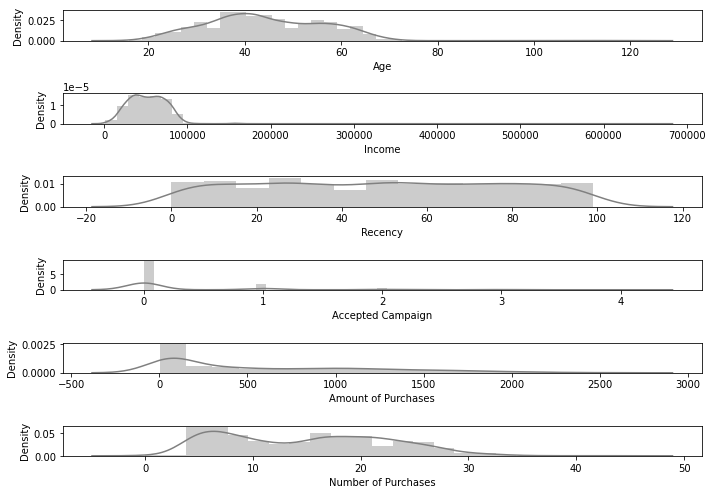

In [ ]:
# Non categorical columns
non_cat = ['Age','Income','Recency','Accepted Campaign','Amount of Purchases','Number of Purchases']
plt.figure(figsize=(10, 10))
n = 0
for i in non_cat:
    plt.subplot(9, pd_market_selected.shape[1]/8, n+1)
    n += 1
    sns.distplot(pd_market_selected[i], color='gray')
    plt.tight_layout()

Skewed:
* `Age`
* `Income`
* `Number of Purchases`
* `Amount of Purchases`

#### Box Plot

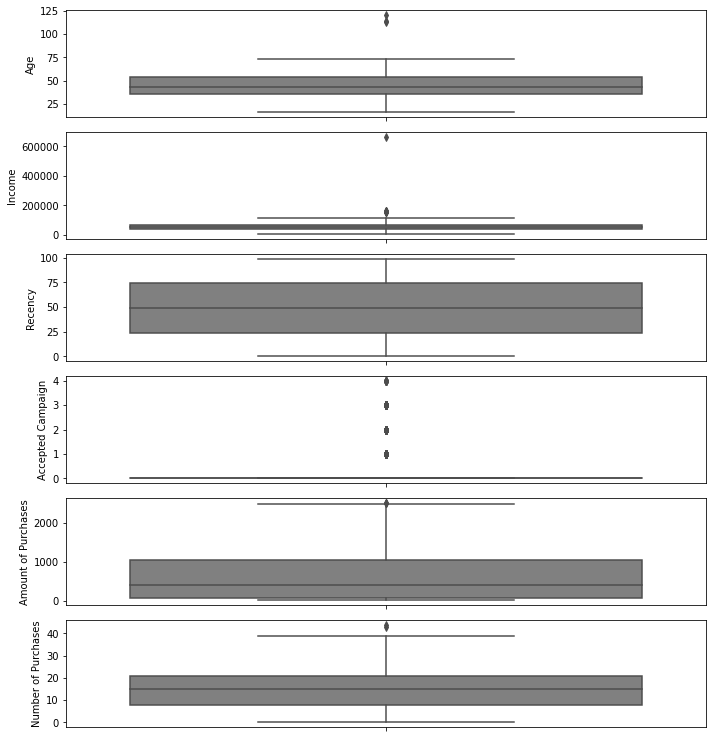

In [ ]:
n = 0
plt.figure(figsize=(10, 12))
for i in non_cat:
    plt.subplot(7, pd_market_selected.shape[1]/6, n+1)
    n+=1
    sns.boxplot(y=pd_market_selected[i], color='gray', orient='v')
    plt.tight_layout()

Each of columns has outliers but not severe

## Correlation Analysis

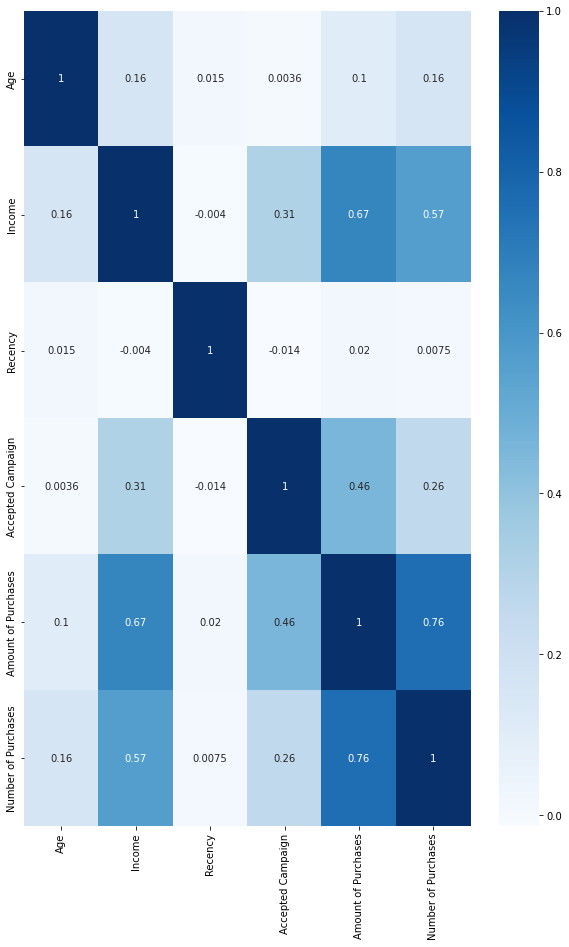

In [ ]:
fig = plt.figure(figsize = (10,15))
sns.heatmap(pd_market_selected[non_cat].corr(), cmap='Blues', annot = True);

Strong Correlation (> 0.5):
* `Number of Purchases` with `Amount of Purchases` (0.76)
* `Income` with `Number of Purchases` (0.67)
* `Income` with `Amount of Purchases` (0.57)

Insight:
* The higher income of the customers, the higher number of purchases and amount spent to the products

Feature Selection for Cluster Analysis:
* `Income` and `Number of Purchases` should be removed to avoid redundant features

In [ ]:
pd_market_selected_feature = pd_market_selected[["Age","Education","Kidhome","Teenhome","Recency",
                                "Accepted Campaign","Amount of Purchases"]]
pd_market_selected_feature.head()

,Age,Education,Kidhome,Teenhome,Recency,Accepted Campaign,Amount of Purchases
0,55,1,0,0,58,0,1617
1,60,1,1,1,38,0,27
2,48,1,0,0,26,0,776
3,30,1,1,0,26,0,53
4,33,3,1,0,94,0,422


In [ ]:
# I saved the pd_market_selected_feature for cluster analysis
pd_market_selected_feature.to_csv('pd_market_selected_feature.csv', index=False)
!cp 'pd_market_selected_feature.csv' '/content/drive/MyDrive/IBM ML/Clustering'

## Log Transformation for Skewed Columns

In [ ]:
pd_market_selected_feature.describe()

,Age,Education,Kidhome,Teenhome,Recency,Accepted Campaign,Amount of Purchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,44.208032,1.664711,0.441787,0.505415,49.012635,0.298285,607.075361
std,12.023812,0.840262,0.536896,0.544181,28.948352,0.679209,602.900476
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,36.000000,1.000000,0.000000,0.000000,24.000000,0.000000,69.000000
50%,43.000000,1.000000,0.000000,0.000000,49.000000,0.000000,396.500000
75%,54.000000,2.000000,1.000000,1.000000,74.000000,0.000000,1048.000000
max,121.000000,3.000000,2.000000,2.000000,99.000000,4.000000,2525.000000


In [ ]:
pd_market_cleaned = pd_market_selected_feature.copy()
skewed = ['Age','Amount of Purchases']
for i in skewed:
  logt = np.log(pd_market_cleaned[i])
  pd_market_cleaned[i] = logt
print("Log Transformation success!")

Log Transformation success!


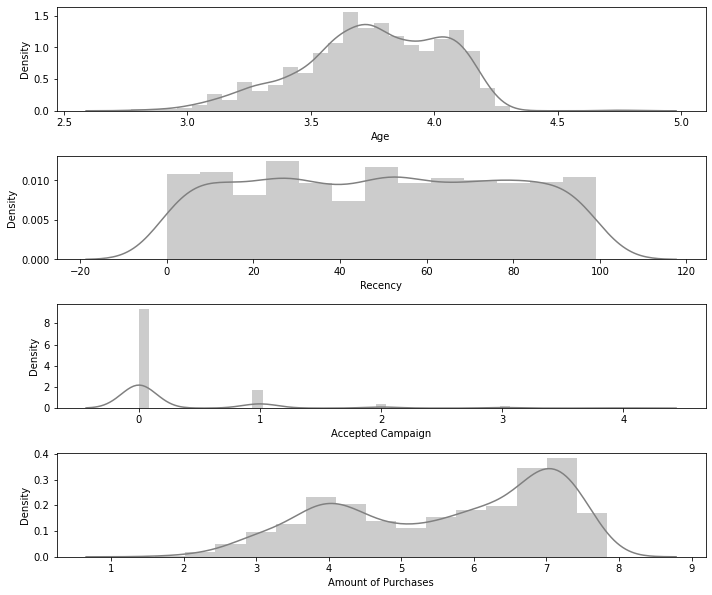

In [ ]:
# Recheck Dist Plot
non_cat = ['Age','Recency','Accepted Campaign','Amount of Purchases']
plt.figure(figsize=(10, 10))
n = 0
for i in non_cat:
    plt.subplot(5, pd_market_cleaned.shape[1]/4, n+1)
    n += 1
    sns.distplot(pd_market_cleaned[i], color='gray')
    plt.tight_layout()

## Feature Scaling

Feature Scaling is done by standardization

In [ ]:
non_cat

['Age', 'Recency', 'Accepted Campaign', 'Amount of Purchases']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in non_cat:
  pd_market_cleaned[i] = scaler.fit_transform(pd_market_cleaned[[i]])
print('Standardization success!')

Standardization success!


In [ ]:
pd_market_cleaned.describe()

,Age,Education,Kidhome,Teenhome,Recency,Accepted Campaign,Amount of Purchases
count,2.216000e+03,2216.000000,2216.000000,2216.000000,2.216000e+03,2.216000e+03,2.216000e+03
mean,-2.240486e-15,1.664711,0.441787,0.505415,-1.175353e-16,4.188387e-17,-3.134526e-16
std,1.000226e+00,0.840262,0.536896,0.544181,1.000226e+00,1.000226e+00,1.000226e+00
min,-3.440389e+00,0.000000,0.000000,0.000000,-1.693488e+00,-4.392649e-01,-2.698616e+00
25%,-5.863871e-01,1.000000,0.000000,0.000000,-8.642385e-01,-4.392649e-01,-9.293267e-01
50%,3.894714e-02,1.000000,0.000000,0.000000,-4.365786e-04,-4.392649e-01,2.493833e-01
75%,8.406139e-01,2.000000,1.000000,1.000000,8.633654e-01,-4.392649e-01,9.045839e-01
max,3.680103e+00,3.000000,2.000000,2.000000,1.727167e+00,5.451271e+00,1.497359e+00


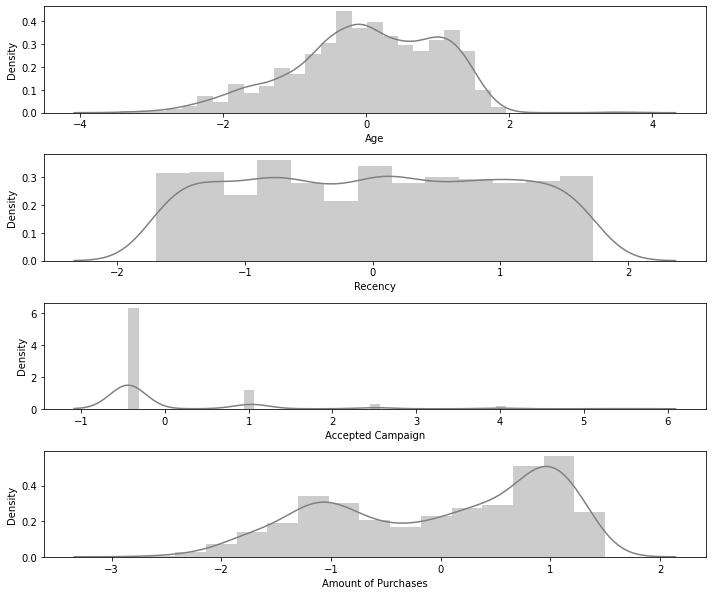

In [ ]:
# Recheck Dist Plot
plt.figure(figsize=(10, 10))
n = 0
for i in non_cat:
    plt.subplot(5, pd_market_cleaned.shape[1]/4, n+1)
    n += 1
    sns.distplot(pd_market_cleaned[i], color='gray')
    plt.tight_layout()

In [ ]:
# I saved the pd_market_cleaned for cluster analysis
pd_market_cleaned.to_csv('pd_market_cleaned.csv', index=False)
!cp 'pd_market_cleaned.csv' '/content/drive/MyDrive/IBM ML/Clustering'

# **Get Insights from Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd_market = pd.read_csv("/content/drive/MyDrive/IBM ML/Clustering/pd_market.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd_market.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Dt_Customer,Education,ID,Income,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth
0,0,0,0,0,0,0,04-09-2012,Graduation,5524,58138.0,0,Single,172,88,88,546,88,635,10,3,4,8,7,58,1,0,1957
1,0,0,0,0,0,0,08-03-2014,Graduation,2174,46344.0,1,Single,2,1,6,6,1,11,1,2,2,1,5,38,0,1,1954
2,0,0,0,0,0,0,21-08-2013,Graduation,4141,71613.0,0,Together,111,49,42,127,21,426,2,1,10,8,4,26,0,0,1965
3,0,0,0,0,0,0,10-02-2014,Graduation,6182,26646.0,1,Together,10,4,5,20,3,11,0,2,4,2,6,26,0,0,1984
4,0,0,0,0,0,0,19-01-2014,PhD,5324,58293.0,1,Married,46,43,15,118,27,173,3,5,6,5,5,94,0,0,1981


#### What is customer's most favorite product?

In [ ]:
product = [pd_market.MntWines.sum(),pd_market.MntFruits.sum(),pd_market.MntMeatProducts.sum(),
           pd_market.MntFishProducts.sum(), pd_market.MntSweetProducts.sum(), pd_market.MntGoldProds.sum()]
labels = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_prod = pd.DataFrame({
    'Labels': labels,
    'Product': product
})
df_prod

,Labels,Product
0,MntWines,676083
1,MntFruits,58405
2,MntMeatProducts,370063
3,MntFishProducts,83405
4,MntSweetProducts,59896
5,MntGoldProds,97427


In [ ]:
df_prod = df_prod.sort_values(by = 'Product',ascending=False)
df_prod

,Labels,Product
0,MntWines,676083
2,MntMeatProducts,370063
5,MntGoldProds,97427
3,MntFishProducts,83405
4,MntSweetProducts,59896
1,MntFruits,58405


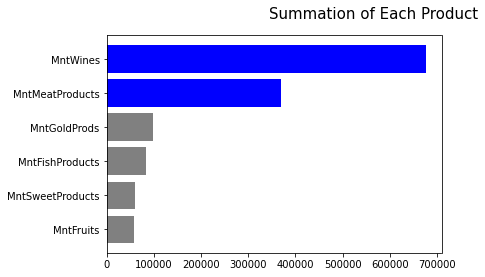

In [ ]:
fig = plt.figure()
fig.suptitle("Summation of Each Product", fontsize=15, ha='left')
plt.barh(df_prod['Labels'][::-1], df_prod['Product'][::-1], color = ['grey','grey','grey','grey','blue','blue'])
plt.show()

Insight:
* Wines and Meat are considered as our most favorite products
* Sweet and Fruits are our less amount of products

#### How is the evaluation of our campaigns? 

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

2052
164
2054
162
1883
333


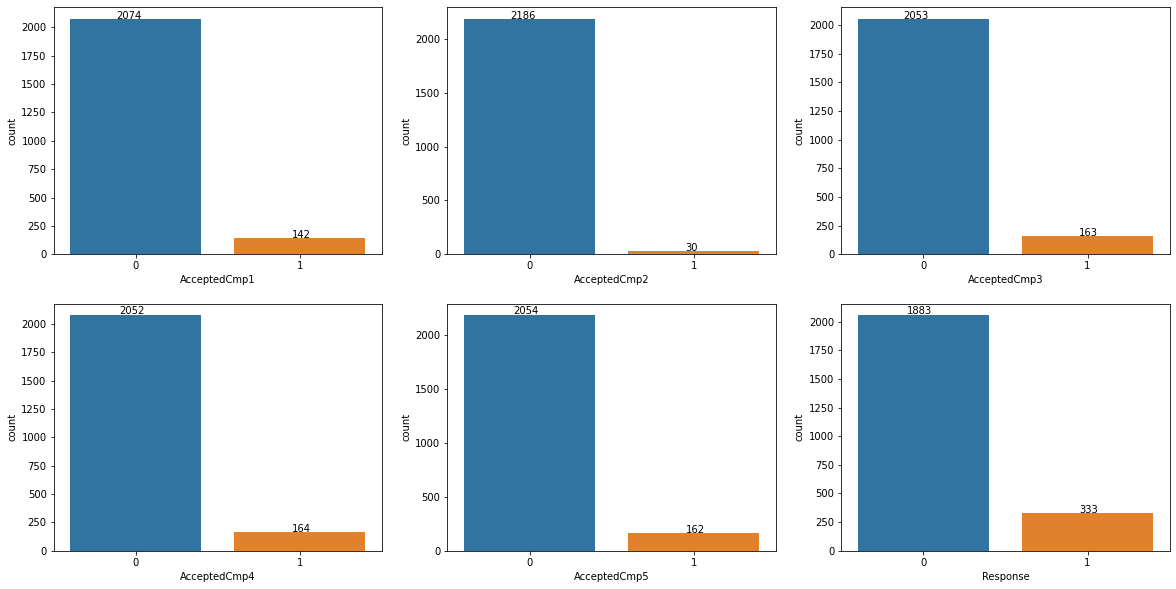

In [ ]:
categorical_features1 = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3"] 
categorical_features2 = ["AcceptedCmp4", "AcceptedCmp5","Response"]
fig, ax = plt.subplots(2, 3, figsize=(20,10))
for i in range(2):
  for j in range(3):
    ax2=sns.countplot(pd_market[categorical_features1[j]],ax=ax[i,j]);
    if i > 0:
      ax2=sns.countplot(pd_market[categorical_features2[j]],ax=ax[i,j]);
      #ax[i,j].set_title(size=20)
      abs_values = pd_market[categorical_features2[j]].value_counts().values
      for p, label in zip(ax2.patches, abs_values):
        print(label)
        if label==2052:
          ax2.annotate(label, (p.get_x()+0.30, p.get_height()+10))
        elif label==2054:
          ax2.annotate(label, (p.get_x()+0.30, p.get_height()+10))
        elif label==1883:
          ax2.annotate(label, (p.get_x()+0.30, p.get_height()+10))
        elif label == 162:
          ax2.annotate(label, (p.get_x()+0.35, p.get_height()*5.5))
        elif label == 333:
          ax2.annotate(label, (p.get_x()+0.35, p.get_height()*2))
        else:
          ax2.annotate(label, (p.get_x()+0.35, p.get_height()+20))
    else:
      abs_values = pd_market[categorical_features1[j]].value_counts().values
      for p, label in zip(ax2.patches, abs_values):
        if label==2074:
          ax2.annotate(label, (p.get_x()+0.28, p.get_height()+0.15))
        elif label==2186:
          ax2.annotate(label, (p.get_x()+0.28, p.get_height()+0.15))
        elif label==2053:
          ax2.annotate(label, (p.get_x()+0.28, p.get_height()+0.15))
        else:
          ax2.annotate(label, (p.get_x()+0.35, p.get_height()+0.15))
fig.show()

Insight:
* Our best accepted campaign is on our last campaign
* Campaign 2 has been our lowest accepted campaign

#### How is customer's favorite purchase place since the day they enroll the company?

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

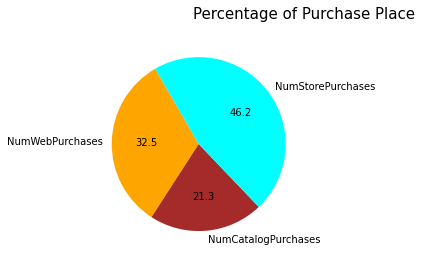

In [ ]:
place = [pd_market.NumWebPurchases.sum(), pd_market.NumCatalogPurchases.sum(),
         pd_market.NumStorePurchases.sum()]
labels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
fig = plt.figure()
fig.suptitle("Percentage of Purchase Place", fontsize=15, ha='left')
plt.pie(place, labels=labels,autopct="%1.1f", startangle=120, colors =['orange','brown','cyan'])
plt.show()

Insight:
* Most of customers (46.2%) are likely to purchase directly from our store

#### How is the growth of customer through years?


In [ ]:
pd_market['Dt_Customer'] = pd.to_datetime(pd_market['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
print (pd_market.Dt_Customer.min())
print (pd_market.Dt_Customer.max())

2012-07-30 00:00:00
2014-06-29 00:00:00


In [ ]:
cust_date = pd_market.groupby("Dt_Customer")["ID"].count().reset_index()
cust_date.head()

,Dt_Customer,ID
0,2012-07-30,1
1,2012-07-31,1
2,2012-08-01,4
3,2012-08-02,3
4,2012-08-03,5


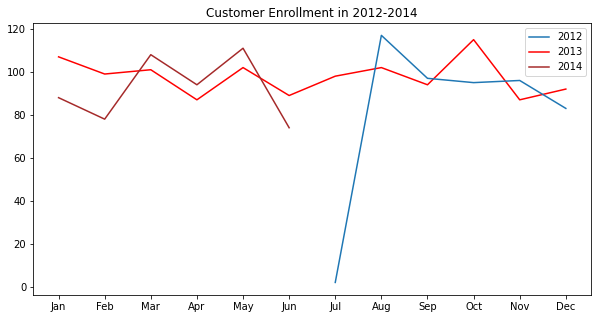

In [ ]:
plt.figure(figsize=(10, 5))
c_2013 = cust_date[cust_date['Dt_Customer'].dt.year == 2013].resample(rule='M', on='Dt_Customer')['ID'].sum().reset_index()
labels2 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(labels2,c_2013['ID'], color='red',label='2013')


c_2014 = cust_date[cust_date['Dt_Customer'].dt.year == 2014].resample(rule='M', on='Dt_Customer')['ID'].sum().reset_index()
labels3 = ['Jan','Feb','Mar','Apr','May','Jun']
plt.plot(labels3,c_2014['ID'], color='brown',label='2014')

c_2012 = cust_date[cust_date['Dt_Customer'].dt.year == 2012].resample(rule='M', on='Dt_Customer')['ID'].sum().reset_index()
labels1 = ['Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(labels1,c_2012['ID'], label='2012')

handles, labels = plt.gca().get_legend_handles_labels()
order = [2,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.title("Customer Enrollment in 2012-2014")
plt.show()

Insight:
* The highest growth comes from July to August in 2012 before went down
* 2013 has similar customer enrollment as August 2012 on October. 2013 likely can be called as our stable year in customer enrollment
* The drop of our customer enrollment happens in 2014: our customer enrollment went down from May to June which has been the lowest customer enrollment throughout the dataset

# **Modelling**

Used machine learning algorithms:
* K-Means Clustering for Cluster Analysis
* Principle Component Analysis (PCA) for Reducing Dimensionality to plot Clustering Result

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

pd_market_cleaned = pd.read_csv("/content/drive/MyDrive/IBM ML/Clustering/pd_market_cleaned.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd_market_cleaned.head()

,Age,Education,Kidhome,Teenhome,Recency,Accepted Campaign,Amount of Purchases
0,0.905192,1,0,0,0.310532,-0.439265,1.196934
1,1.211422,1,1,1,-0.380509,-0.439265,-1.561814
2,0.426086,1,0,0,-0.795134,-0.439265,0.702026
3,-1.228053,1,1,0,-0.795134,-0.439265,-1.107164
4,-0.892617,3,1,0,1.554407,-0.439265,0.291400


In [ ]:
pd_market_selected_feature = pd.read_csv("/content/drive/MyDrive/IBM ML/Clustering/pd_market_selected_feature.csv")
pd_market_selected_feature.head()

,Age,Education,Kidhome,Teenhome,Recency,Accepted Campaign,Amount of Purchases
0,55,1,0,0,58,0,1617
1,60,1,1,1,38,0,27
2,48,1,0,0,26,0,776
3,30,1,1,0,26,0,53
4,33,3,1,0,94,0,422


### Cluster Analysis using K-Means Clustering

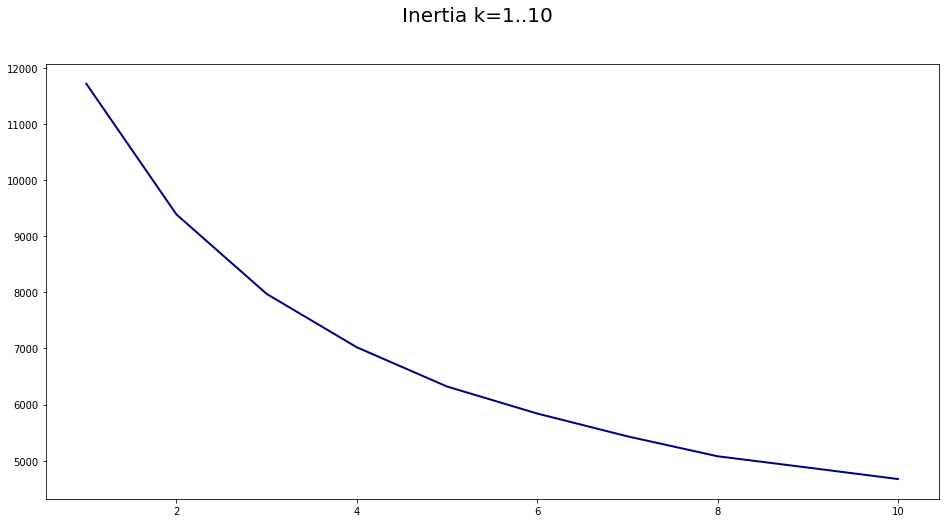

In [ ]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pd_market_cleaned)
    inertia.append(kmeans.inertia_)

fig = plt.figure(figsize=(16, 8))
# plt.plot(inertia)

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 2)
# sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--');
fig.suptitle('Inertia k=1..10', fontsize=20)
plt.show()

Based on Elbow Method, the candidate for number of clusters:
* k = 2
* k = 3
* k = 4

Then, I compared those k's with their Silhouette Scores

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette = []
k = []

for i in range(2, 5):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pd_market_cleaned)
    label=kmeans.predict(pd_market_cleaned)
    sil = silhouette_score(pd_market_cleaned, label)
    k.append(i)
    silhouette.append(sil)

pd.DataFrame({'k':k, 'Silhouette Score':silhouette})

,k,Silhouette Score
0,2,0.193448
1,3,0.208620
2,4,0.186752


Therefore, I choose the number of clusters (k) = 3 because it has the highest Silhouette Score

In [ ]:
# Modelling
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pd_market_cleaned)
label=kmeans.labels_
print("Success!")

Success!


## Dimensionality Reduction for Clustering Plot

I used Principle Component Analysis (PCA) to perform plotting for my clustering result from previous cluster analysis because of limitation of dimensional plotting

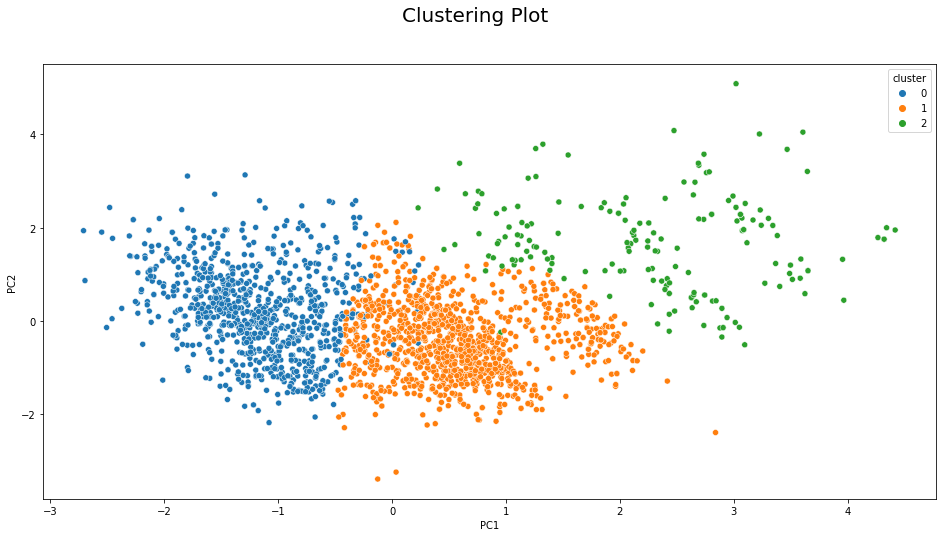

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(pd_market_cleaned),columns=['PC1','PC2'])
kmeans_2 =KMeans(n_clusters=3).fit(pd_market_cleaned)
pca_data['cluster'] = pd.Categorical(kmeans_2.labels_)
fig = plt.figure(figsize=(16, 8))
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)
fig.suptitle('Clustering Plot', fontsize=20)
plt.show()

# **Interpretation**

## Descriptive Analysis for each Cluster

In [ ]:
pd_market_selected = pd.read_csv("/content/drive/MyDrive/IBM ML/Clustering/pd_market_selected_feature.csv")
pd_market_selected['Cluster'] = label
pd_market_selected.describe()

,Age,Education,Kidhome,Teenhome,Recency,Accepted Campaign,Amount of Purchases,Cluster
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,44.208032,1.664711,0.441787,0.505415,49.012635,0.298285,607.075361,0.573556
std,12.023812,0.840262,0.536896,0.544181,28.948352,0.679209,602.900476,0.638144
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,36.000000,1.000000,0.000000,0.000000,24.000000,0.000000,69.000000,0.000000
50%,43.000000,1.000000,0.000000,0.000000,49.000000,0.000000,396.500000,0.000000
75%,54.000000,2.000000,1.000000,1.000000,74.000000,0.000000,1048.000000,1.000000
max,121.000000,3.000000,2.000000,2.000000,99.000000,4.000000,2525.000000,2.000000


In [ ]:
pd_market_cluster = pd_market_selected.groupby('Cluster').agg(['count', 'mean','median', 'min', 'max']).reset_index()
pd_market_cluster

Cluster   Age                            Education                          Kidhome                          Teenhome                          Recency                           Accepted Campaign                          Amount of Purchases                               
          count       mean median min  max     count      mean median min max   count      mean median min max    count      mean median min max   count       mean median min max             count      mean median min max               count         mean  median min   max
0       0  1125  49.070222   49.0  20  121      1125  1.777778    2.0   0   3    1125  0.155556    0.0   0   2     1125  0.655111    1.0   0   2    1125  49.678222   51.0   0  99              1125  0.189333    0.0   0   1                1125   870.555556   854.0  22  2440
1       1   911  39.099890   38.0  16   67       911  1.513721    1.0   0   3     911  0.864984    1.0   0   2      911  0.380900    0.0   0   2     911  48.738749   48.0   0  99               911  0.072448    0.0   0   1                 911   103.266740    57.0   5  1435
2       2   180  39.672222   37.0  17   70       180  1.722222    1.0   1   3     180  0.088889    0.0   0   1      180  0.200000    0.0   0   2     180  46.238889   40.5   1  99               180  2.122222    2.0   1   4                 180  1510.155556  1573.0  46  2525

## Customer Segmentation for Customer Personality Analysis

Cluster 0
* Count of population: 1125 (51%) - - the highest population
* Average of age: 49 years old -- the oldest population
* Education: 2n cycle or Master's degree
* Kidhome: 0 (There is no kid at home)
* Teenhome: 1 (There is a teenager home)
* Average of recency: 50 days -- the highest average of recency
* Average of accepted campaign: 0 time(s)
* Average of Amount of Purchases: 870

Cluster 1
* Count of population: 911 (41%)
* Average of age: 39 years old -- the youngest population
* Average of education: Bachelor's degree
* Kidhome: 1 (There is a kid at home)
* Teenhome: 0 (There is no teenager at home)
* Average of recency: 49 days
* Average of accepted campaign: 0 time(s)
* Average of Amount of Purchases: 103 - the lowest amount of purchases

Cluster 2
* Count of population: 180 (8%) - the lowest population
* Average of age: 45 years old
* Average of education: 2n cycle or Master's degree / Bachelor's degree
* Kidhome: 0 (There is no kid at home)
* Teenhome: 0 (There is no teenager at home)
* Average of recency: 46 days - the lowest recency
* Average of accepted campaign: 2 times - the highest accepted campaign
* Average of Amount of Purchases: 1510 - the highest amount of purchases

## Business Insights

* Cluster 0 is our intermediate loyal customers since this cluster has intermediate amount of purchases (not as high as Cluster 2, but not too low than Cluster 1). It has the highest population and oldest customers. They mostly have teenagers at home, thus they are likely to manage their financial spending by by not too often for shopping. It is proved that they have the highest recency (number of days since customer's last purchase), which means they are rarely to shop in our store. Therefore, we should give them special flash sales or promotions to attract them spending more as soon as possible and make sure that they always come to us periodically
* Cluster 1 is our lost customers. It has the lowest amount of purchases and high average of recency which achieves small difference compared by Cluster 0. We should increase our quality services for those in this cluster by evaluating from their complaints. In addition, they mostly have kids at home. Therefore, we can try to attract them by giving them special prices for products for kid's daily needs
* Cluster 2 is our best loyal customers. It is proved by its lowest recency and the highest amount of purchases. They mostly accepted our campaigns and spent more into their daily needs. We need to appreciate them by giving them certain promotions, e.g. discount, cashback vouchers, birthday gift(s). They do not have either kid or teenager at home. Therefore, certain promotion in products for their daily needs is useful to maintain their loyalty to our market

# **Summary of Key Findings**

* This dataset has 24 missing values which have been removed for analysis. Furthermore, Inefficient columns, such as `Z_CostContact` and `Z_Revenue` also be removed
* Wines and Meat are considered as our most favorite products, while
Sweet and Fruits are our less amount of products
* Our best accepted campaign is on our last campaign
In contrast, Campaign 2 has been our lowest accepted campaign
* Most of customers are likely to purchase directly from our store, but not less customers has purchased from our website. Therefore, website development to attract customers should be gradually improved
* The highest growth comes from July to August in 2012 before went down. 2013 has similar customer enrollment as August 2012 on October. 2013 likely can be called as our stable year in customer enrollment.The drop of our customer enrollment happens in 2014: our customer enrollment went down from May to June which has been the lowest customer enrollment throughout the dataset. We should find strategy to increase customer enrollment by cluster analysis
* I created new columns for cluster analysis, such as accepted campaign, amount of products, and number of purchases 
* I used K-Means Clustering for Cluster Analysis and Principle Component Analysis (PCA) as my dimensionality reduction algorithm to visualize my clustering result from K-Means (reducted into 2-D)
* K-Means Clustering performs its best if: data's distribution is not skewed and be standardized. I performed feature selection to avoid redundant features, handling skewed features by performing log transformation, and feature scaling by standardization
* The best number of clusters has been achieved through the highest Silhouette Score: 3 clusters of customers
* Cluster 0 is our intermediate loyal customers, Cluster 1 is our lost customers, and Cluster 2 is our best loyal customers
* Recommendation: Cluster 0 should be given special flash sales or promotions. Cluster 1 should be evaluated by checking their complaint forms and given special prices for kid's daily needs. Cluster 2 should be maintained by giving them certain promotions as appreciation 


#**Suggestions**

* Attempt for another clustering algorithm, e.g. Fuzzy C-Means Clustering
* Perform different steps of data cleaning and or feature engineering to get variant results